In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 666)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 888)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
# 多输出
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

concat = keras.layers.concatenate([input_wide, hidden2])
# 分别指定输出层得到数据的来源
output = keras.layers.Dense(1)(concat)  
output2 = keras.layers.Dense(1)(hidden2)

# 初始化模型时，分别指定多输出和多输入
model = keras.models.Model(inputs = [input_wide, input_deep],
                           outputs = [output, output2])
        
model.compile(loss="mean_squared_error", optimizer="sgd")

callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

In [7]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

In [8]:
# 模型训练时，因为是多输出的结构，需要设置多个输出，即便是一样的
history = model.fit([x_train_scaled_wide, x_train_scaled_deep],
                    [y_train, y_train],
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep],
                        [y_valid, y_valid]),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.9840 - dense_2_loss: 0.9275 - dense_3_loss: 1.0565 - val_loss: 1.1734 - val_dense_2_loss: 0.4964 - val_dense_3_loss: 0.6770
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1535 - dense_2_loss: 0.4873 - dense_3_loss: 0.6663 - val_loss: 1.0526 - val_dense_2_loss: 0.4509 - val_dense_3_loss: 0.6017
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0588 - dense_2_loss: 0.4603 - dense_3_loss: 0.5985 - val_loss: 0.9679 - val_dense_2_loss: 0.4192 - val_dense_3_loss: 0.5486
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9952 - dense_2_loss: 0.4354 - dense_3_loss: 0.5598 - val_loss: 0.9443 - val_dense_2_loss: 0.4115 - val_dense_3_loss: 0.5328
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9507 - dense_2_loss: 0.4210 - dense_3_loss: 0.5297 - val_loss: 0.8739 - val_dense_2_loss: 0.3893 - val_dense_3_loss: 0.

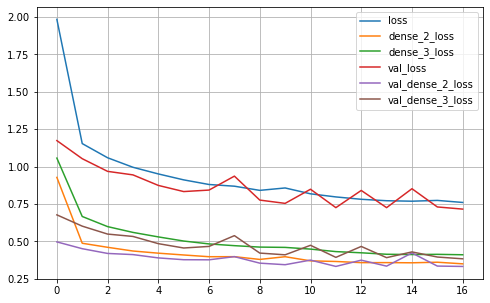

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
#     plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [12]:
# 对模型评估时也需要指定多输入输出的数据源
model.evaluate([x_test_scaled_wide, x_test_scaled_deep],
               [y_test, y_test], verbose=0)

[0.7649261951446533, 0.35501930117607117, 0.4099070131778717]